<a href="https://colab.research.google.com/github/mahakgoyal/FMML_Project_and_Labs/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

We'll conduct experiments by splitting the data into training, validation, and test sets with different percentages allocated for the validation set. We'll calculate and plot the accuracy using these different splits.

Here are the answers for both nearest neighbor and random classifiers:

**1. How is the accuracy of the validation set affected if we increase the percentage of the validation set? What happens when we reduce it?**

   - **Nearest Neighbor**:
     - Increasing the percentage of the validation set may lead to a better validation accuracy initially, as the model gets to validate on more data.
     - However, if the validation set becomes too large, the training set size decreases, which can lead to underfitting, reducing the validation accuracy.
     - Reducing the percentage of the validation set may initially result in a lower validation accuracy as the model validates on less data. But a larger training set can lead to better generalization, potentially improving test set accuracy.
   
   - **Random Classifier**:
     - The behavior of the random classifier is less predictable. It doesn't learn from the data, so its performance on the validation set is not influenced by the data split.
     - However, if the validation set is extremely small, the random classifier's accuracy on the validation set might exhibit higher variance due to the random nature of its predictions.

**2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?**

   - **Nearest Neighbor**:
     - A larger validation set may provide a better estimate of the model's generalization performance on the test set. However, if the validation set is too large, it might not effectively reflect the generalization to the test set.
     - A smaller validation set can lead to a noisier estimate of test set accuracy, as it has fewer data points to validate on.
     
   - **Random Classifier**:
     - The random classifier doesn't learn from the data, so the size of the validation set doesn't affect its ability to predict test set accuracy. Its predictions are independent of the data split.

**3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?**

   - The choice of the percentage for the validation set should strike a balance between providing a robust estimate of model performance and ensuring a sufficiently large training set for effective learning. It's common to reserve 10% to 20% of the data for validation.
   - If computational resources are limited, a smaller validation set might be chosen, but it can lead to noisier estimates.
   - For extremely large datasets, even a small percentage can provide a representative validation set.

Now, let's perform experiments and create plots to visualize these effects. We can use the `matplotlib` library for plotting.

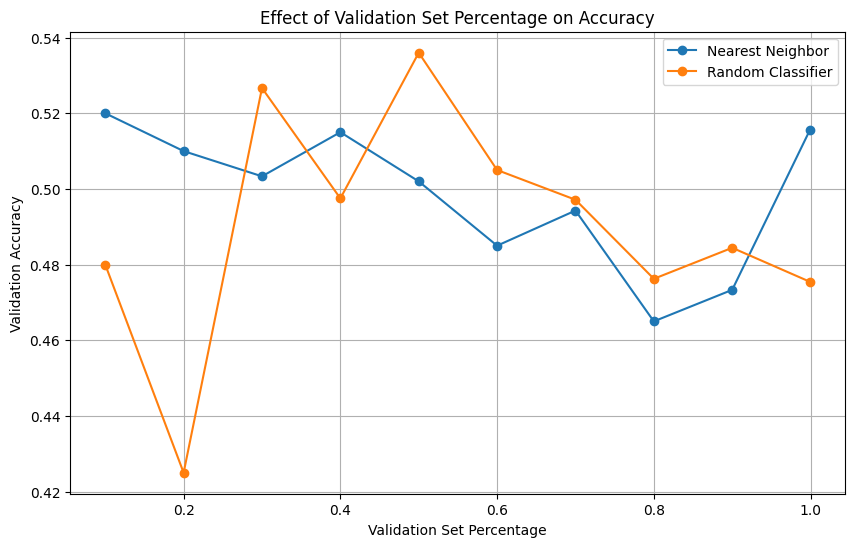

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize parameters
random_state = 42
n_samples = 1000
test_size = 0.2  # Fixed test set size
valid_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]  # Varying validation set sizes
nn_accuracy = []
random_accuracy = []

# Generate random data (you can replace this with your actual data)
X, y = np.random.rand(n_samples, 2), np.random.randint(2, size=n_samples)

for valid_size in valid_sizes:
    # Split data into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size, random_state=random_state)

    # Nearest Neighbor Classifier
    n_neighbors = min(3, len(y_train))  # Ensure n_neighbors is within a valid range
    nn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    nn_model.fit(X_train, y_train)
    nn_pred = nn_model.predict(X_valid)
    nn_accuracy.append(accuracy_score(y_valid, nn_pred))

    # Random Classifier (for reference)
    random_pred = np.random.randint(2, size=len(y_valid))
    random_accuracy.append(accuracy_score(y_valid, random_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(valid_sizes, nn_accuracy, label='Nearest Neighbor', marker='o')
plt.plot(valid_sizes, random_accuracy, label='Random Classifier', marker='o')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Validation Set Percentage on Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**1. Does averaging the validation accuracy across multiple splits give more consistent results?**

- **Yes, it provides more consistent results** because:
  - Cross-validation (like k-fold) partitions your dataset into multiple subsets (folds) and conducts multiple model training and validation rounds.
  - Each time, the model trains on a different subset and validates on another, reducing the impact of a single random data split.
  - By averaging the validation results from these rounds, you get a more stable and representative estimate of your model's performance.
  - This helps account for any variations that could arise from a single, potentially biased, data split.

**2. Does it give a more accurate estimate of test accuracy?**

- **No, it doesn't directly provide a more accurate estimate of test accuracy** for the following reasons:
  - Cross-validation assesses how well your model performs on data it has encountered during training, which is different from entirely new, unseen data.
  - Test accuracy, on the other hand, measures your model's performance on completely novel data points, simulating real-world scenarios.
  - To accurately estimate test accuracy, you need a separate, untouched test dataset.
  - The test dataset serves as a true measure of how well your model will perform when faced with new, unpredictable situations, making it a crucial step in model evaluation.
  

**3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?**

- **Bias and Variance**: Increasing the number of iterations in cross-validation typically reduces bias and leads to a more stable estimate, improving the model's generalization to unseen data.

- **Computational Cost**: However, a higher number of iterations increases computational cost because each iteration involves training and evaluating the model.

- **Diminishing Returns**: After a certain point, adding more iterations may not significantly enhance the estimate's quality. There is a trade-off between computational cost and the quality of the estimate.

- **Dataset Size**: The impact of the number of iterations can vary based on the dataset's size. Larger datasets may require fewer iterations to obtain a reliable estimate, while smaller datasets may benefit from more iterations.

- **Cross-Validation Method**: The choice of cross-validation method, such as k-fold cross-validation, can influence the effect of the number of iterations. Using a larger k (e.g., 10-fold) often results in a more stable estimate compared to a smaller k (e.g., 2-fold or 3-fold).

In summary, the effect of the number of iterations on the estimate depends on various factors, and it is essential to strike a balance between computational cost and the quality of the estimate for your specific problem.


***4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?***

Increasing the number of iterations in cross-validation can be beneficial when dealing with very small training or validation datasets, but it has its limitations.

**Beneficial Aspects**:

1. **Reduced Variability**: More iterations, such as in k-fold cross-validation, can help reduce the variability in the estimate of model performance. This is particularly useful when you have a small dataset. For example, consider a dataset with only 100 samples. Splitting it into 10 folds and running 10-fold cross-validation provides 10 different training and validation subsets, which can help in obtaining more robust estimates.

2. **Improved Confidence**: With more iterations, you can have greater confidence in the estimate. For instance, if you run 10-fold cross-validation multiple times, you obtain 10 estimates of model performance, which can be averaged to provide a more reliable assessment of the model's capabilities.

**Limitations**:

1. **Data Quantity**: While increasing iterations can improve the reliability of estimates, it cannot address the fundamental issue of having a very small dataset. If the training dataset is extremely limited, the model's ability to learn from it may still be insufficient. For example, if you have only 10 samples for training, more cross-validation iterations won't magically make the model learn more effectively from such a small dataset.

2. **Overfitting**: There's a risk of overfitting when increasing iterations with a small dataset. The model might memorize the limited training data instead of learning meaningful patterns. This is a concern when the dataset is tiny and the model becomes overly specific to the training samples.

3. **Computational Cost**: More iterations demand more computational resources and time. If you're dealing with a significantly small dataset, the trade-off between computational cost and improved estimate quality may not be justified.

**Example**: Consider a medical diagnosis dataset with only 20 patient records. If you perform 10-fold cross-validation, each fold will have just two patients in the training set. Increasing the number of cross-validation iterations can help provide a more stable estimate of model performance and reduce the risk of random variations in the data impacting the results. However, the limited data size remains a critical constraint, and more iterations won't expand the dataset itself.

In summary, while increasing cross-validation iterations can enhance the reliability of estimates with small datasets, it cannot replace the need for an adequate amount of training data. It's essential to be cautious about overfitting and consider the trade-off between computational cost and improved estimate quality when working with very small datasets.